In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
#load imdb dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [8]:
train_labels[0]

1

In [9]:
#you’re restricting yourself to the top 10,000 most frequent words, no word
#index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [10]:
# decode it back to english words
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,keys) for keys,value in word_index.items()])

decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
#encoding the integer sequence into binary matrix
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension),dtype=np.float32)
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

train_data=vectorize_sequences(train_data)
test_data=vectorize_sequences(test_data)

In [13]:
train_labels=np.array(train_labels).astype('float32')
test_labels=np.array(test_labels).astype('float32')
train_data[0].shape

(10000,)

In [32]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(units=16,activation='relu',input_shape=(10000,)))
model.add(keras.layers.Dense(units=16,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

In [34]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'],loss='binary_crossentropy')



In [16]:
#creating a validation data set
x_train=train_data[:15000]
train_label=train_labels[:15000]
x_val=train_data[15000:]
val_label=train_labels[15000:]


history=model.fit(x_train,train_label,batch_size=250,epochs=20,validation_data=(x_val,val_label),verbose=1)

Epoch 1/20
60/60 [==============================] - 2s 31ms/step - loss: 0.4575 - accuracy: 0.8134 - val_loss: 0.3255 - val_accuracy: 0.8803
Epoch 2/20
60/60 [==============================] - 1s 17ms/step - loss: 0.2447 - accuracy: 0.9135 - val_loss: 0.2786 - val_accuracy: 0.8880
Epoch 3/20
60/60 [==============================] - 1s 17ms/step - loss: 0.1781 - accuracy: 0.9377 - val_loss: 0.3089 - val_accuracy: 0.8779
Epoch 4/20
60/60 [==============================] - 1s 16ms/step - loss: 0.1355 - accuracy: 0.9549 - val_loss: 0.3097 - val_accuracy: 0.8846
Epoch 5/20
60/60 [==============================] - 1s 17ms/step - loss: 0.1070 - accuracy: 0.9647 - val_loss: 0.3248 - val_accuracy: 0.8826
Epoch 6/20
60/60 [==============================] - 1s 16ms/step - loss: 0.0807 - accuracy: 0.9754 - val_loss: 0.3799 - val_accuracy: 0.8750
Epoch 7/20
60/60 [==============================] - 1s 17ms/step - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.4238 - val_accuracy: 0.8717
Epoch 8/20
60

In [21]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

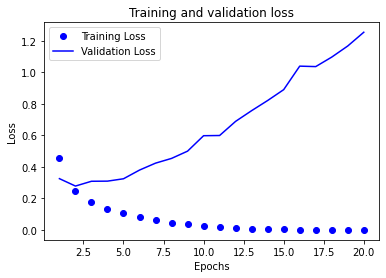

In [28]:
# plotting training and validation loss
loss_value=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,loss_value,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

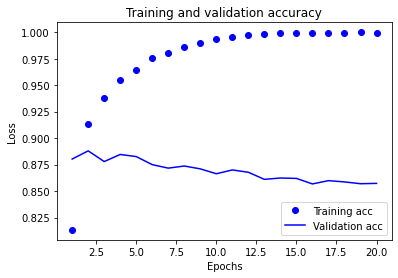

In [30]:
# plotting training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
history=model.fit(x_train,train_label,batch_size=250,epochs=4,validation_data=(x_val,val_label),verbose=1)

Epoch 1/4
60/60 [==============================] - 2s 30ms/step - loss: 0.4761 - accuracy: 0.8201 - val_loss: 0.3464 - val_accuracy: 0.8816
Epoch 2/4
60/60 [==============================] - 1s 21ms/step - loss: 0.2656 - accuracy: 0.9123 - val_loss: 0.2848 - val_accuracy: 0.8893
Epoch 3/4
60/60 [==============================] - 1s 20ms/step - loss: 0.1901 - accuracy: 0.9347 - val_loss: 0.2725 - val_accuracy: 0.8932
Epoch 4/4
60/60 [==============================] - 1s 21ms/step - loss: 0.1466 - accuracy: 0.9525 - val_loss: 0.2932 - val_accuracy: 0.8877


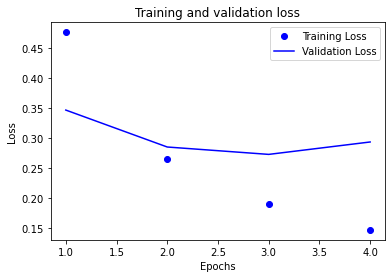

In [37]:
# Again plotting training and validation loss with epochs of 4
history_dict=history.history
history_dict.keys()

loss_value=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(history_dict['accuracy'])+1)

plt.plot(epochs,loss_value,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
model.predict(test_data)

array([[0.16650504],
       [0.9989774 ],
       [0.16149837],
       ...,
       [0.12208882],
       [0.03795949],
       [0.15183204]], dtype=float32)

In [39]:
model.evaluate(test_data,test_labels)

782/782 [==============================] - 3s 3ms/step - loss: 0.3221 - accuracy: 0.8741


[0.32213637232780457, 0.8740800023078918]